In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

In [9]:
train_data = pd.read_csv("titanic.csv")

In [10]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Checking for the missing data**


In [11]:
train_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

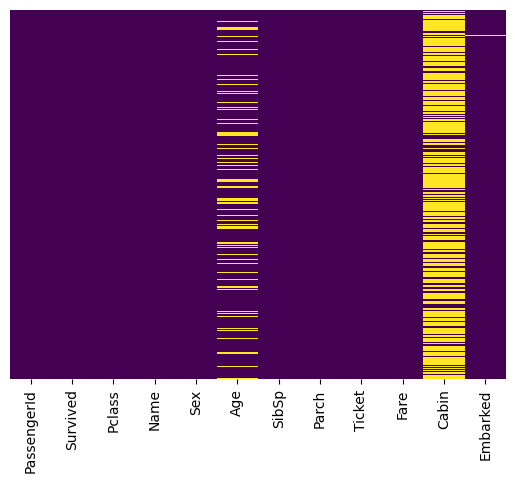

In [14]:
sns.heatmap(train_data.isnull(), yticklabels = False,cbar = False, cmap="viridis")

**handling the null values now**

<Axes: xlabel='Survived', ylabel='count'>

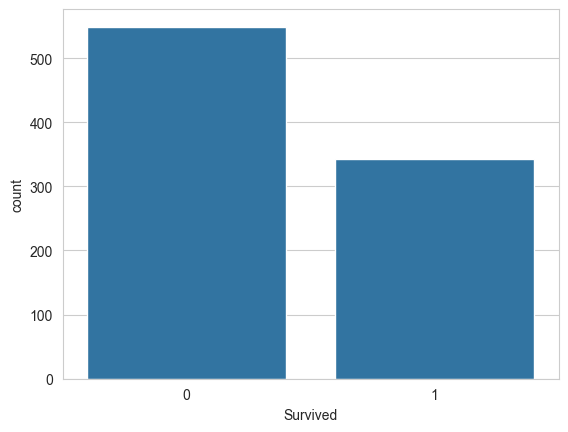

In [16]:
sns.set_style("whitegrid")
sns.countplot(x = "Survived",data = train_data)

<Axes: xlabel='Survived', ylabel='count'>

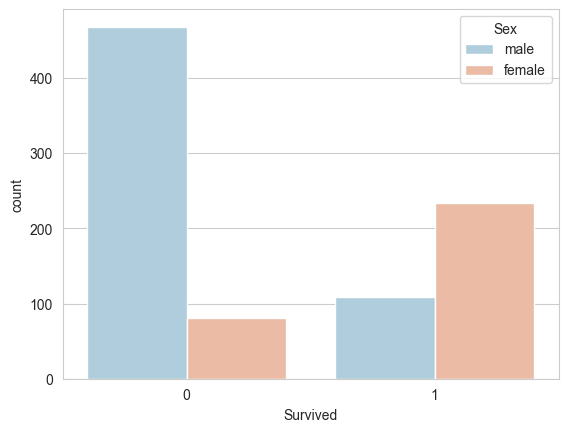

In [17]:
sns.set_style("whitegrid")
sns.countplot(x = "Survived",hue ="Sex", data = train_data,palette = "RdBu_r")

<Axes: xlabel='Survived', ylabel='count'>

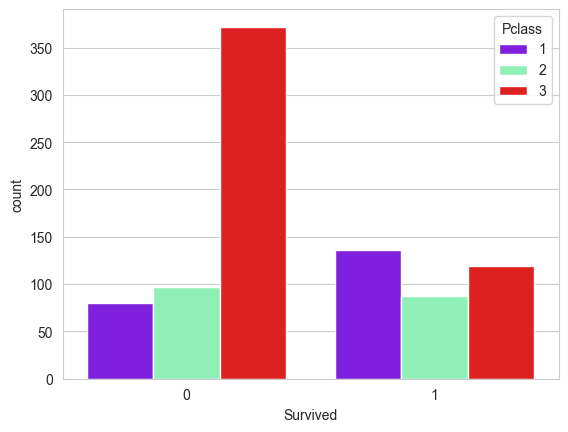

In [20]:
sns.set_style("whitegrid")
sns.countplot(x = "Survived",hue = "Pclass", data = train_data, palette = "rainbow")

<Axes: xlabel='Age', ylabel='Count'>

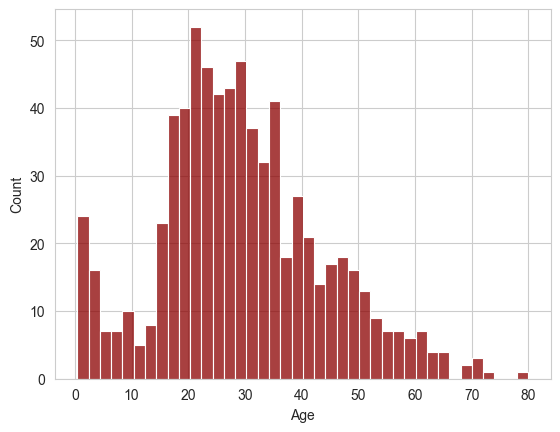

In [23]:
sns.histplot(train_data["Age"].dropna(),kde=False,color = "darkred",bins=40)

<Axes: xlabel='SibSp', ylabel='count'>

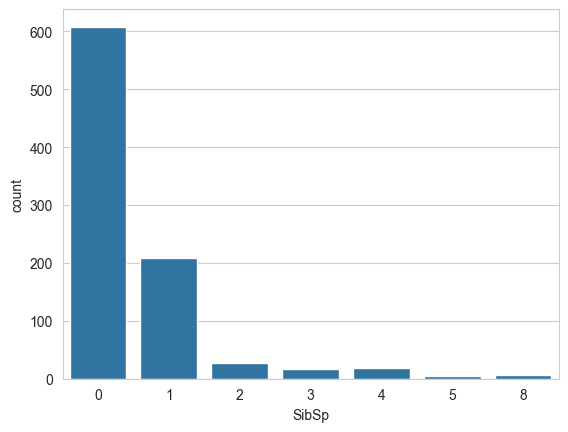

In [24]:
sns.countplot(x = "SibSp",data = train_data)

<Axes: >

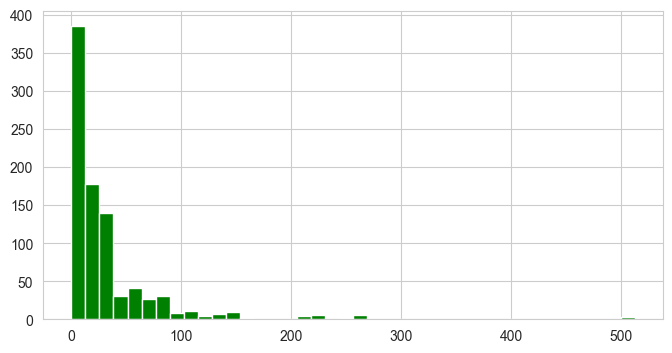

In [27]:
train_data['Fare'].hist(color = "green",bins = 40,figsize =(8,4))

**Data Cleaning**

<Axes: xlabel='Pclass', ylabel='Age'>

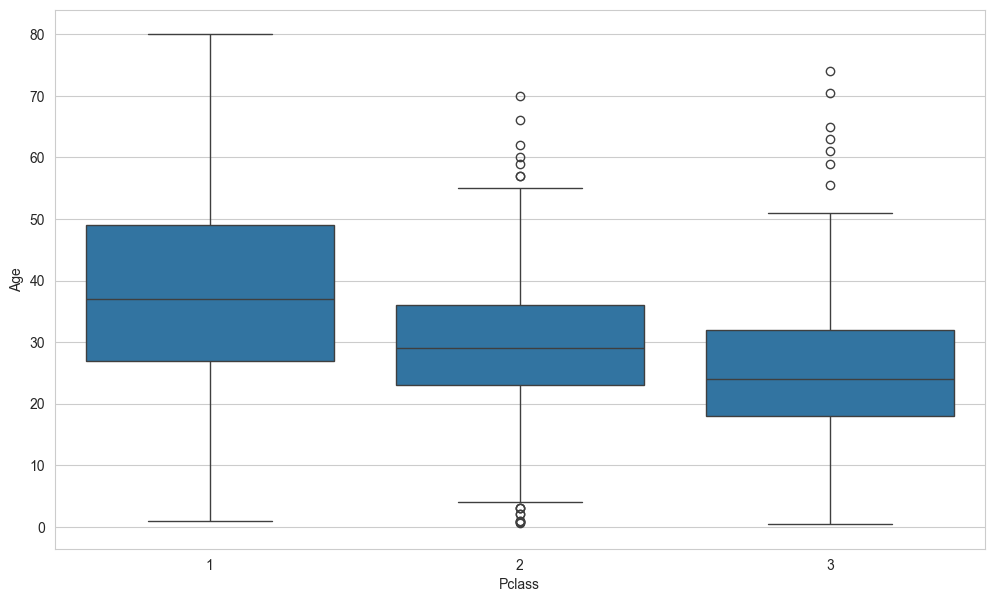

In [31]:

plt.figure(figsize=(12,7))
sns.boxplot(x = "Pclass",y = "Age",data = train_data)

In [41]:
def impute_age(cols):      #giving the columns that is age & passenger class columns
    Age = cols.iloc[0]           
    Pclass = cols.iloc[1]
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age 

    

In [42]:
train_data["Age"] = train_data[["Age","Pclass"]].apply(impute_age,axis = 1)

<Axes: >

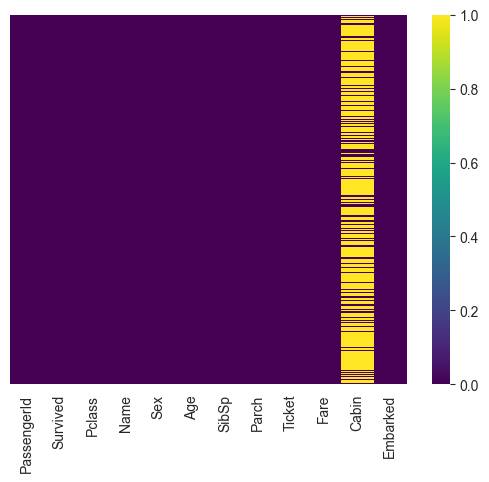

In [44]:
sns.heatmap(train_data.isnull(),yticklabels = False, cmap = "viridis")
#we can see in the previous heat map there is a age data with null values we handled that here 

In [56]:
 train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [57]:
pd.get_dummies(train_data["Embarked"],drop_first=True).head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [59]:
#now we are dropping some cols coz we have converted them in the catagorical form
sex = pd.get_dummies(train_data["Sex"],drop_first = True)
embark = pd.get_dummies(train_data["Embarked"],drop_first = True)

In [61]:
train_data.drop(["Sex","Embarked","Name","Ticket"],axis = 1 , inplace = True)

In [62]:
train_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [63]:
train_data = pd.concat([train_data,embark],axis = 1)

In [64]:
train_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S
0,1,0,3,22.0,1,0,7.2500,False,True
1,2,1,1,38.0,1,0,71.2833,False,False
2,3,1,3,26.0,0,0,7.9250,False,True
3,4,1,1,35.0,1,0,53.1000,False,True
4,5,0,3,35.0,0,0,8.0500,False,True


**Train Test Split by logistic Regression**

In [65]:
train_data["Survived"].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [75]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


1.6.1


In [76]:
print(sklearn.__version__)

1.6.1


In [77]:
from sklearn.model_selection import train_test_split

In [80]:
x_train,x_test,y_train,y_test = train_test_split(train_data.drop("Survived",axis =1),train_data["Survived"],test_size = 0.30,random_state=101)

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
logmodel = LogisticRegression()

In [85]:
logmodel.fit(x_train,y_train)

C:\Users\athar\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [86]:
prediction = logmodel.predict(x_test)

In [92]:
from sklearn.metrics import confusion_matrix 


In [93]:
accurecy = confusion_matrix(y_test,prediction)

In [94]:
accurecy

array([[136,  18],
       [ 67,  47]])

In [100]:
 from sklearn.matrics import accuracy_score 

ModuleNotFoundError: No module named 'sklearn.matrics'